## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer as countVectorizer
import difflib

%matplotlib inline

In [2]:
bom_gross_df=pd.read_csv("zippedData/bom.movie_gross.csv.gz")
imdb_basics_df=pd.read_csv("zippedData/imdb.title.basics.csv.gz")
imdb_ratings_df=pd.read_csv("zippedData/imdb.title.ratings.csv.gz")

In [34]:
imdb_basics_df.isnull().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [32]:
imdb_merged['Genres'].map(lambda x:x.split(','))

0                [Action, Crime, Drama]
1                    [Biography, Drama]
2                               [Drama]
4              [Comedy, Drama, Fantasy]
6        [Adventure, Animation, Comedy]
                      ...              
73849                           [Drama]
73850                     [Documentary]
73851                     [Documentary]
73852                   [Drama, Family]
73855                     [Documentary]
Name: Genres, Length: 65720, dtype: object

In [3]:
#Code which shows that there are Movie records in IMDB.titles.Basics which has no corresponding values 
#(ie.,rating and number of votes in IMDB.titles.ratings table)
df = imdb_basics_df.merge(imdb_ratings_df, 
                          how = 'outer' ,
                          indicator = True).loc[lambda x : x['_merge']=='left_only']
print(df.isnull().sum())
df.describe()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    24119
genres              4604
averagerating      72288
numvotes           72288
_merge                 0
dtype: int64


,start_year,runtime_minutes,averagerating,numvotes
count,72288.000000,48169.000000,0.0,0.0
mean,2014.974961,74.544769,NaN,NaN
std,2.806210,75.355311,NaN,NaN
min,2010.000000,1.000000,NaN,NaN
25%,2013.000000,54.000000,NaN,NaN
50%,2015.000000,73.000000,NaN,NaN
75%,2017.000000,90.000000,NaN,NaN
max,2115.000000,6017.000000,NaN,NaN


In [4]:
# Code to Merge datasets
imdb_merged = pd.merge(imdb_basics_df
                       ,imdb_ratings_df)
imdb_merged.info() 
print("Total records considered for analysis",len(imdb_merged))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB
Total records considered for analysis 73856


In [5]:
#To find null values in the merged data
imdb_merged.isnull().sum()


tconst                0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [6]:
#To find the percentage of null values in the merged dataset
percent_missing_values_imdb = ((imdb_merged.isnull().sum())/len(imdb_merged))*100
percent_missing_values_imdb 

tconst              0.000000
primary_title       0.000000
original_title      0.000000
start_year          0.000000
runtime_minutes    10.317374
genres              1.088605
averagerating       0.000000
numvotes            0.000000
dtype: float64

In [7]:
#To remove the rows with null values in runtime_minutes column and genres column-IMDB merged dataset
imdb_merged.dropna(inplace=True)
imdb_merged.columns =imdb_merged.columns.str.title()
imdb_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65720 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Tconst           65720 non-null  object 
 1   Primary_Title    65720 non-null  object 
 2   Original_Title   65720 non-null  object 
 3   Start_Year       65720 non-null  int64  
 4   Runtime_Minutes  65720 non-null  float64
 5   Genres           65720 non-null  object 
 6   Averagerating    65720 non-null  float64
 7   Numvotes         65720 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [8]:
# Code to split the genres to individual columns
gen={i.strip() for i in np.hstack(imdb_merged['Genres'].map(lambda x:x.split(',')))}
for c in gen:
    imdb_merged[c] = 0

for index, row in imdb_merged.iterrows():
    for g in row['Genres'].split(','):
        imdb_merged.at[index,g] = 1

In [9]:
imdb_merged.head()

,Tconst,Primary_Title,Original_Title,Start_Year,Runtime_Minutes,Genres,Averagerating,Numvotes,Game-Show,Horror,...,Reality-TV,Crime,Drama,War,History,Musical,Adult,Documentary,Biography,News
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,0,0,...,0,1,1,0,0,0,0,0,0,0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,0,0,...,0,0,1,0,0,0,0,0,1,0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,0,0,...,0,0,1,0,0,0,0,0,0,0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,0,0,...,0,0,1,0,0,0,0,0,0,0
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Finding null values in BOM_movie_gross
percent_missing_values_bom = ((bom_gross_df.isnull().sum())/
                              len(bom_gross_df))*100
percent_missing_values_bom

title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64

In [11]:
#To remove the rows with null values in BOM gross dataset
bom_gross_df = bom_gross_df.dropna()
bom_gross_df.columns = bom_gross_df.columns.str.title()
bom_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           2007 non-null   object 
 1   Studio          2007 non-null   object 
 2   Domestic_Gross  2007 non-null   float64
 3   Foreign_Gross   2007 non-null   object 
 4   Year            2007 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 94.1+ KB


In [12]:
# To convert data type of column "Foreign_Gross" to Float
bom_gross_df["Foreign_Gross"] = bom_gross_df["Foreign_Gross"].str.replace(',','')
bom_gross_df["Foreign_Gross"] = bom_gross_df["Foreign_Gross"].astype(float, errors = 'raise')

/var/folders/hm/6_zngc651rb5gtdj9b3dg25r0000gn/T/ipykernel_5341/1318612404.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bom_gross_df["Foreign_Gross"] = bom_gross_df["Foreign_Gross"].str.replace(',','')
/var/folders/hm/6_zngc651rb5gtdj9b3dg25r0000gn/T/ipykernel_5341/1318612404.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bom_gross_df["Foreign_Gross"] = bom_gross_df["Foreign_Gross"].astype(float, errors = 'raise')


In [13]:
# Adding a column Total gross which is Domestic Gross + Foreign Gross
bom_gross_df["Total Gross(millions)"] = (bom_gross_df["Foreign_Gross"] + bom_gross_df["Domestic_Gross"])/1000000

/var/folders/hm/6_zngc651rb5gtdj9b3dg25r0000gn/T/ipykernel_5341/917680204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bom_gross_df["Total Gross(millions)"] = (bom_gross_df["Foreign_Gross"] + bom_gross_df["Domestic_Gross"])/1000000


In [14]:
bom_gross_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  2007 non-null   object 
 1   Studio                 2007 non-null   object 
 2   Domestic_Gross         2007 non-null   float64
 3   Foreign_Gross          2007 non-null   float64
 4   Year                   2007 non-null   int64  
 5   Total Gross(millions)  2007 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 109.8+ KB


In [15]:
genre_revenue = pd.merge(left=bom_gross_df,
                         right=imdb_merged,
                         left_on='Title', 
                         right_on='Primary_Title',
                         how='left')
genre_revenue=genre_revenue.dropna()
genre_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1767 entries, 0 to 2232
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  1767 non-null   object 
 1   Studio                 1767 non-null   object 
 2   Domestic_Gross         1767 non-null   float64
 3   Foreign_Gross          1767 non-null   float64
 4   Year                   1767 non-null   int64  
 5   Total Gross(millions)  1767 non-null   float64
 6   Tconst                 1767 non-null   object 
 7   Primary_Title          1767 non-null   object 
 8   Original_Title         1767 non-null   object 
 9   Start_Year             1767 non-null   float64
 10  Runtime_Minutes        1767 non-null   float64
 11  Genres                 1767 non-null   object 
 12  Averagerating          1767 non-null   float64
 13  Numvotes               1767 non-null   float64
 14  Game-Show              1767 non-null   float64
 15  Horr

In [16]:
genre_revenue.head()

,Title,Studio,Domestic_Gross,Foreign_Gross,Year,Total Gross(millions),Tconst,Primary_Title,Original_Title,Start_Year,...,Reality-TV,Crime,Drama,War,History,Musical,Adult,Documentary,Biography,News
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1067.0,tt0435761,Toy Story 3,Toy Story 3,2010.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Inception,WB,292600000.0,535700000.0,2010,828.3,tt1375666,Inception,Inception,2010.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,752.6,tt0892791,Shrek Forever After,Shrek Forever After,2010.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,698.5,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Iron Man 2,Par.,312400000.0,311500000.0,2010,623.9,tt1228705,Iron Man 2,Iron Man 2,2010.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
bom_gross_df.head()

,Title,Studio,Domestic_Gross,Foreign_Gross,Year,Total Gross(millions)
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1067.0
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1025.5
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,960.3
3,Inception,WB,292600000.0,535700000.0,2010,828.3
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,752.6


In [18]:
genre_revenue['Domestic_Gross'].sum()

88493177588.0

In [19]:
bom_gross_df['Domestic_Gross'].sum()

94368819285.0

In [22]:
genre_revenue['Foreign_Gross'].sum()
# 152111302376.5 Orginal
# 140645810948.9 Cleaned Value

140645810948.9

In [23]:
bom_gross_df['Foreign_Gross'].sum()

152111302376.5

In [24]:
genre_revenue['Total Gross(millions)'].sum()
# 246480.12166149996 Orginial Value
# 229138.98853690003 Cleaned Value

229138.98853690003

In [25]:
bom_gross_df['Total Gross(millions)'].sum()

246480.12166149996

In [26]:
# To find Top Rated genres
x_values = gen
y_values = {}
for x in x_values:
   y_values[x] = imdb_merged[imdb_merged[x] == 1]['Averagerating'].mean()

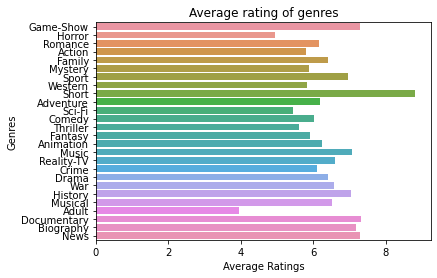

In [28]:
# To plot genres based on average rating to find the top rated genres

genres_names = list(y_values.keys())
genres_rating = list(y_values.values())
sns.barplot(x = genres_rating,
            y = genres_names)
plt.xlabel("Average Ratings")
plt.ylabel("Genres")
plt.title("Average rating of genres")
plt.show()

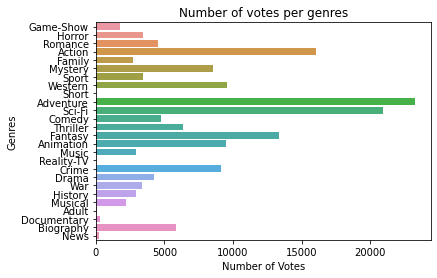

In [29]:
# To plot genres based on number of votes.
x_values = gen
Numvotes_values = {}
for x in x_values:
   Numvotes_values[x] = imdb_merged[imdb_merged[x] == 1]['Numvotes'].mean()

genres_names = list(Numvotes_values.keys())
genres_numvotes = list(Numvotes_values.values())
sns.barplot(x = genres_numvotes,
            y = genres_names)
plt.xlabel("Number of Votes")
plt.ylabel("Genres")
plt.title("Number of votes per genres")
plt.show()

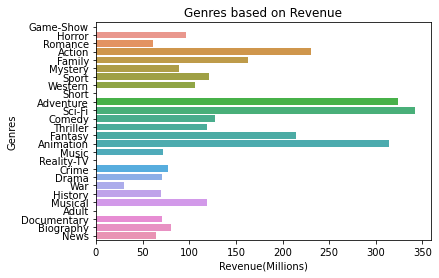

In [30]:
x_values = gen
genre_Revenue_values = {}
for x in x_values:
   genre_Revenue_values[x] = genre_revenue[genre_revenue[x] == 1]['Total Gross(millions)'].mean()

genres_names = list(genre_Revenue_values.keys())
genres_Revenue = list(genre_Revenue_values.values())
sns.barplot(x = genres_Revenue,
            y = genres_names)
plt.xlabel("Revenue(Millions)")
plt.ylabel("Genres")
plt.title("Genres based on Revenue")
plt.show()